In [1]:
# #ASSIGNMENT 3
# #Title: Build an Image Classification Model
# #Stages:
# #a. Loading and preprocessing the image data
# #b. Defining the model’s architecture
# #c. Training the model
# #d. Estimating the model performance
# #Name: PRANJAL SUHAS PATIL
# #Roll No: 46
# #Batch: IT-3
# #Department: Information Technology

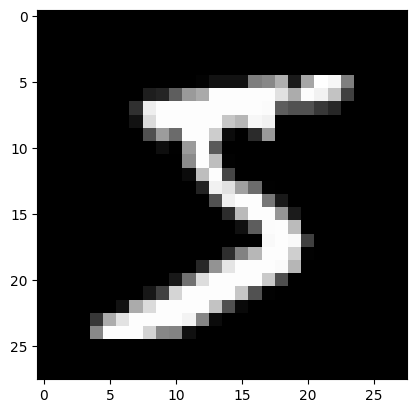

In [7]:
# -------------------------------------------
# A. Loading and Preprocessing Image Data
# -------------------------------------------
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import random

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)  #(batch_size, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)

# ✅ Optional: Show a single sample image
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
# plt.title("Sample Digit: {}".format(y_train[0]))
plt.show()

In [8]:
# -------------------------------------------
# B. Model Architecture
# -------------------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)), #32 → number of filters, (3, 3) → filter size
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [9]:
# -------------------------------------------
# C. Training the Model
# -------------------------------------------
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)  #verbose=1 → show progress bar and per-epoch results

Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1626 - accuracy: 0.9519
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0546 - accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0173 - accuracy: 0.9944


Test Accuracy: 0.9854999780654907
Test Loss: 0.0441385917365551


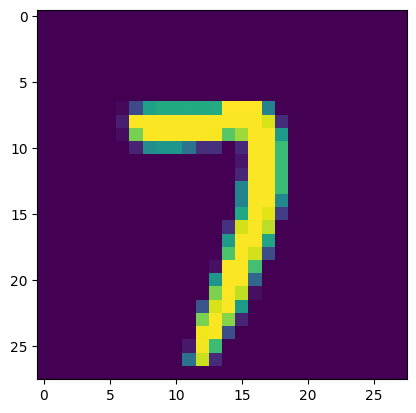

313/313 [==============================] - 1s 3ms/step
Handwritten number in the image is= 7


In [12]:
# -------------------------------------------
# D. Evaluating the Model
# -------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

# Predict a random sample

n=random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

# # Predict a random sample
# import random
# n = random.randint(0, len(X_test)-1)
# plt.imshow(X_test[n].reshape(28, 28), cmap="gray")
# plt.title("Predicted: " + str(np.argmax(model.predict(X_test[n].reshape(1,28,28,1)))))
# plt.show()





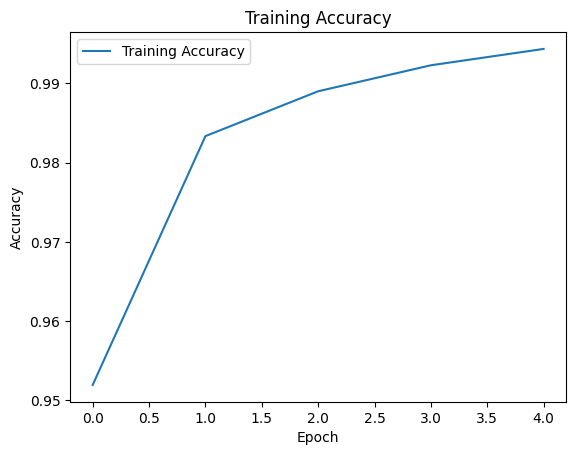

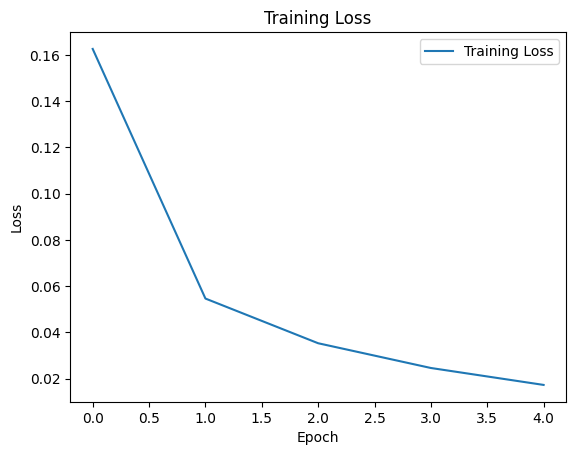

In [13]:
# ---- Accuracy Plot ----
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ---- Loss Plot ----
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

